In [5]:
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import pandas as pd
import math


In [2]:
#import raw data from CSV
filename = "Code/water_lab2.csv"
df = pd.read_csv(filename)
df

,Run 1: Time (min),Run 1: Temperature (°C),Run 2: Time (min),Run 2: Temperature (°C)
0,0.000,21.5,0.000,16.2
1,0.008,21.5,0.008,15.7
2,0.017,21.9,0.017,16.2
3,0.025,21.5,0.025,16.2
4,0.033,21.9,0.033,15.7
...,...,...,...,...
2766,NaN,NaN,23.050,14.5
2767,NaN,NaN,23.058,14.5
2768,NaN,NaN,23.067,14.5
2769,NaN,NaN,23.075,14.9


In [3]:
#separate into two dataframes because I'm bad at indexing
#drop N/A values 
#drop last 2 minutes of data, had a spike in temp from touching temp probe 
run1 = df.iloc[:,0:2:1].dropna(axis=0, how='any').iloc[:2024] 
run2 = df.iloc[:,2:4:1].dropna(axis=0, how='any')

run2

,Run 2: Time (min),Run 2: Temperature (°C)
0,0.000,16.2
1,0.008,15.7
2,0.017,16.2
3,0.025,16.2
4,0.033,15.7
...,...,...
2765,23.042,14.5
2766,23.050,14.5
2767,23.058,14.5
2768,23.067,14.5


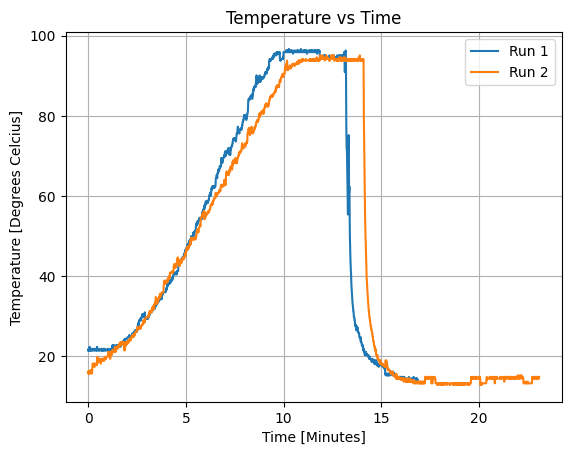

In [41]:
#Constants for Projected Temp Calculation
m_pot = 446                            #[g] mass of pot
m_water = 505                          #[g] mass of water
id = 0.1142                            #[m] inner diameter of pot
od = id + 2*0.003                      #[m] outer diameter (3mm thickness)
v = 0.000793                           #[m^3] original volume of water 
a_water = math.pi*0.25*math.pow(id,2)  #[m^2] area of water exposed 
a_pot = math.pi*0.25*math.pow(od,2)    #[m^2] area of bottom of pot
height = v/a_water                     #[m] original height of water in pot 
Q_in = 334                             #[W] based on mean of runs 1 and 2
C_pot = 0.753                          #[J/g*K] specific heat of glass
C_water = 4.186                        #[J/g*K] specific heat of water
#[m^2] Surface area of pot and water exposed to surroundings
SA = a_pot + a_water + math.pi*od*(4/3)*height + math.pi*id*(1/4)*height
h = 7                                  #[W/m^2*K] given
T_room = 18                            #[C]
delta_t = .008*60                      #[s] matches interval of experiment sampling
T_boil = 100                           #[C]


In [48]:
dict = {'Time (min)': [0], 'Projected Temp (C)': [T_room]}
projdf = pd.DataFrame(dict)

In [43]:
projdf

,Time (min),Projected Temp (C)
0,0,18


In [49]:
count = 1
# don't laugh at while loops with pandas 
# Calculates temp at intervals of 0.48s with each subsequent temp based on the previous
while projdf['Projected Temp (C)'].iloc[-1] < 100:
    projdf.loc[len(projdf.index)] = [count*delta_t/60, 
                                     delta_t*((Q_in-(h*SA*
                                     (projdf['Projected Temp (C)'].iloc[-1]-T_room)))
                                    /(m_pot*C_pot+m_water*C_water))+
                                     projdf['Projected Temp (C)'].iloc[-1]]
    count += 1 
projdf

,Time (min),Projected Temp (C)
0,0.000,18.000000
1,0.008,18.065443
2,0.016,18.130880
3,0.024,18.196311
4,0.032,18.261735
...,...,...
1328,10.624,99.780564
1329,10.632,99.838434
1330,10.640,99.896298
1331,10.648,99.954158


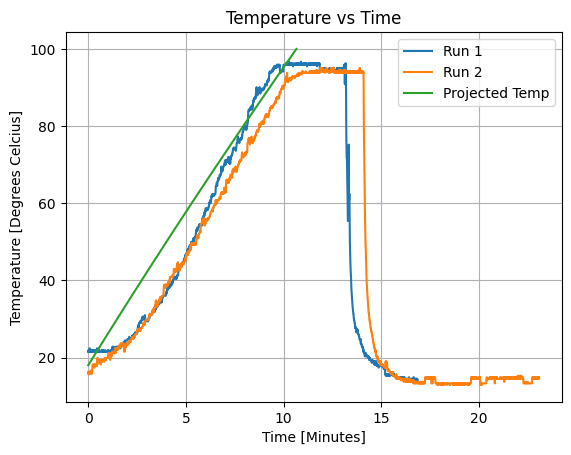

In [50]:
#plot both runs on same chart and save figure
plt.plot(run1['Run 1: Time (min)'], run1.iloc[:,1:2:1], label='Run 1')
plt.plot(run2['Run 2: Time (min)'], run2.iloc[:,1:2:1], label='Run 2')
plt.plot(projdf['Time (min)'], projdf['Projected Temp (C)'], label='Projected Temp')
plt.title('Temperature vs Time')
plt.grid()
plt.legend()
plt.xlabel("Time [Minutes]")
plt.ylabel("Temperature [Degrees Celcius]")
plt.savefig('Lab1_TempvsTime.png')